In [ ]:
from tensorflow.keras.datasets import imdb
from sklearn.model_selection import train_test_split
(train_input, train_target), (test_input, test_target) = imdb.load_data(num_words=500)
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size=0.2, random_state=42)

17473536/17464789 [==============================] - 0s 0us/step


In [ ]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
train_seq = pad_sequences(train_input, maxlen=100)
val_seq = pad_sequences(val_input, maxlen=100)

In [ ]:
from tensorflow import keras
model = keras.Sequential()
model.add(keras.layers.Embedding(500, 16, input_length=100))
model.add(keras.layers.LSTM(8))
model.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 16)           8000      
_________________________________________________________________
lstm (LSTM)                  (None, 8)                 800       
_________________________________________________________________
dense (Dense)                (None, 1)                 9         
Total params: 8,809
Trainable params: 8,809
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-lstm-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
# restore-True 이거 뭐지
history = model.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 13s 36ms/step - loss: 0.6928 - accuracy: 0.5350 - val_loss: 0.6923 - val_accuracy: 0.5538
Epoch 2/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6911 - accuracy: 0.5939 - val_loss: 0.6901 - val_accuracy: 0.6010
Epoch 3/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6877 - accuracy: 0.6236 - val_loss: 0.6857 - val_accuracy: 0.6208
Epoch 4/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6805 - accuracy: 0.6476 - val_loss: 0.6754 - val_accuracy: 0.6492
Epoch 5/100
313/313 [==============================] - 11s 35ms/step - loss: 0.6571 - accuracy: 0.6798 - val_loss: 0.6249 - val_accuracy: 0.6934
Epoch 6/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5817 - accuracy: 0.7282 - val_loss: 0.5664 - val_accuracy: 0.7310
Epoch 7/100
313/313 [==============================] - 11s 35ms/step - loss: 0.5443 - accuracy: 0.7462 - val_loss: 0.5346 - val_ac

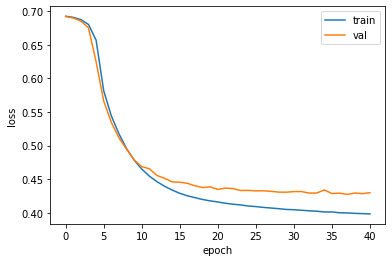

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model2 = keras.Sequential()
model2.add(keras.layers.Embedding(500, 16, input_length=100))
model2.add(keras.layers.LSTM(8, dropout=0.3))
model2.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model2.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model2.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 14s 37ms/step - loss: 0.6927 - accuracy: 0.5305 - val_loss: 0.6924 - val_accuracy: 0.5546
Epoch 2/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6918 - accuracy: 0.5638 - val_loss: 0.6911 - val_accuracy: 0.5890
Epoch 3/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6896 - accuracy: 0.5978 - val_loss: 0.6879 - val_accuracy: 0.6206
Epoch 4/100
313/313 [==============================] - 11s 37ms/step - loss: 0.6819 - accuracy: 0.6464 - val_loss: 0.6707 - val_accuracy: 0.6714
Epoch 5/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6455 - accuracy: 0.6872 - val_loss: 0.6299 - val_accuracy: 0.6922
Epoch 6/100
313/313 [==============================] - 11s 36ms/step - loss: 0.6187 - accuracy: 0.7021 - val_loss: 0.6089 - val_accuracy: 0.7146
Epoch 7/100
313/313 [==============================] - 11s 36ms/step - loss: 0.5971 - accuracy: 0.7255 - val_loss: 0.5891 - val_ac

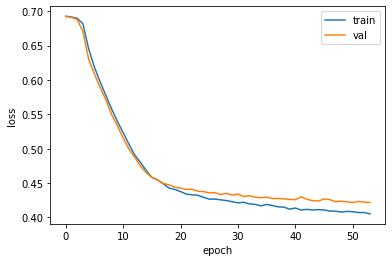

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()

In [ ]:
model3 = keras.Sequential()
model3.add(keras.layers.Embedding(500, 16, input_length=100))
model3.add(keras.layers.LSTM(8, dropout=0.3, return_sequences=True))
model3.add(keras.layers.LSTM(8, dropout=0.3))
model3.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model3.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_3 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
lstm_4 (LSTM)                (None, 100, 8)            800       
_________________________________________________________________
lstm_5 (LSTM)                (None, 8)                 544       
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 9         
Total params: 9,353
Trainable params: 9,353
Non-trainable params: 0
_________________________________________________________________


In [ ]:
rmsprop = keras.optimizers.RMSprop(learning_rate=1e-4)
model3.compile(optimizer=rmsprop, loss='binary_crossentropy', metrics='accuracy')
checkpoint_cb = keras.callbacks.ModelCheckpoint('best-dropout-model.h5')
early_stopping_cb = keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True)
history = model3.fit(train_seq, train_target, epochs=100, batch_size=64, validation_data=(val_seq, val_target), callbacks=[checkpoint_cb, early_stopping_cb])


Epoch 1/100
313/313 [==============================] - 25s 70ms/step - loss: 0.4344 - accuracy: 0.8007 - val_loss: 0.4429 - val_accuracy: 0.7938
Epoch 2/100
313/313 [==============================] - 21s 68ms/step - loss: 0.4319 - accuracy: 0.8009 - val_loss: 0.4426 - val_accuracy: 0.7940
Epoch 3/100
313/313 [==============================] - 21s 68ms/step - loss: 0.4308 - accuracy: 0.8027 - val_loss: 0.4427 - val_accuracy: 0.7966
Epoch 4/100
313/313 [==============================] - 21s 68ms/step - loss: 0.4304 - accuracy: 0.8030 - val_loss: 0.4548 - val_accuracy: 0.7880
Epoch 5/100
313/313 [==============================] - 21s 68ms/step - loss: 0.4312 - accuracy: 0.8026 - val_loss: 0.4410 - val_accuracy: 0.7950
Epoch 6/100
313/313 [==============================] - 21s 68ms/step - loss: 0.4305 - accuracy: 0.8029 - val_loss: 0.4399 - val_accuracy: 0.7946
Epoch 7/100
313/313 [==============================] - 21s 68ms/step - loss: 0.4298 - accuracy: 0.8021 - val_loss: 0.4391 - val_ac

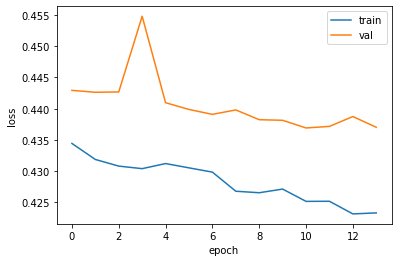

In [ ]:
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.show()  
# 다시

In [ ]:
# GRU 셀

In [ ]:
model4 = keras.Sequential()
model4.add(keras.layers.Embedding(500, 16, input_length=100))
model4.add(keras.layers.GRU(8))
model4.add(keras.layers.Dense(1, activation='sigmoid'))

In [ ]:
model4.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_4 (Embedding)      (None, 100, 16)           8000      
_________________________________________________________________
gru (GRU)                    (None, 8)                 624       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 9         
Total params: 8,633
Trainable params: 8,633
Non-trainable params: 0
_________________________________________________________________


In [ ]:
test_seq = pad_sequences(test_input, maxlen=100)
rnn_model = keras.models.load_model('best-rnn-model.h5')
rnn_model.evaluate(val_seq, val_target)

OSError: ignored